# Portfolio 3

Aleks Baskakovs


# EXERCISE 1 - Load the magnetoencephalographic recordings and do some initial plots to understand the data


### 1) Load megmag_data.npy and call it data using np.load. You can use join, which can be imported from os.path, to create paths from different string segments

i. The data is a 3-dimensional array. The first dimension is number of repetitions of a visual stimulus , the second dimension is the number of sensors that record magnetic fields (in Tesla) that stem from neurons activating in the brain, and the third dimension is the number of time samples. How many repetitions, sensors and time samples are there?

**Aleks**: There are 682 repetitions, 102 sensors and 251 time samples.


ii. The time range is from (and including) -200 ms to (and including) 800 ms with a sample recorded every 4 ms. At time 0, the visual stimulus was briefly presented. Create a 1-dimensional array called times that represents this.

iii. Create the sensor covariance matrix $\Sigma_{XX}$:
$N$ is the number of repetitions and $X$ has $s$ rows and $t$ columns (sensors and time), thus the shape is $X_{s\times t}$. Do the sensors pick up independent signals? (Use plt.imshow to plot the sensor covariance matrix)

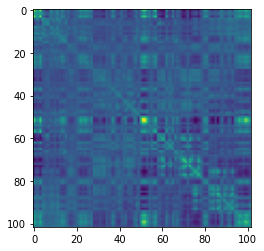

In [1]:
# First we gotta load the MEG data. Pretty cool!

import numpy as np
import matplotlib.pyplot as plt

data = np.load("megmag_data.npy")
y = np.load("pas_vector.npy")

times = np.arange(-200, 804, step = 4)

def cov_func():

    cov = np.zeros(shape = (102, 102))

    for i in range(102):

        A = data[i, :, :]
        B = np.transpose(A)

        cov += np.dot(A, B)
    
    cov = cov / 102

    return cov


cov = cov_func()

plt.imshow(cov)



**Aleks**: With plot showing generally little covariance I would say that yes, the signals seem to be more or less independent. Although intuitively, I would expect there to be more covariance between sensors located close to each other, maybe it's there on the plot but I can't locate it.


iv. Make an average over the repetition dimension using np.mean - use the axis argument. (The resulting array should have two dimensions with time as the first and magnetic field as the second with sensor as the first and time as the second)

v. Plot the magnetic field (based on the average) as it evolves over time for each of the sensors (a line for each) (time on the x-axis and magnetic field on the y-axis). Add a horizontal line at $y = 0$ and a vertical line at $x = 0$ using plt.axvline and plt.axhline

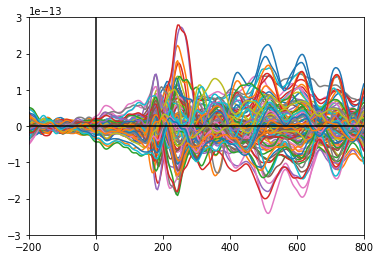

In [2]:

# Average brain activation from -200ms to 800ms accross all repetitions.

rep_avg = np.mean(data, axis = 0)

plt.figure() # create new figure
plt.plot(times, rep_avg.T) # plot a blue line
plt.axvline(x = 0, color = "black")
plt.axhline(y = 0, color = "black")
#plt.grid(every = 5)
plt.axis([-200,800,-3e-13,3e-13])
plt.show()




vi. Find the maximal magnetic field in the average. Then use np.argmax and np.unravel_index to find the sensor that has the maximal magnetic field.

In [3]:
sensor_max = np.max(rep_avg) # finding maximum magnetic field value

np.argmax(rep_avg) # finding the index (think: coordinates) for the biggest value
print(np.argmax(rep_avg))
a = np.unravel_index(np.argmax(rep_avg), shape = (102, 251)) # shape = the space where it searches for the index
print(a)
print(times[112]) # remember that times is defined by from -200 to 800 by 4ms (dependent on experiment design)
# answer: 248, see the graph x-axis, this correspond to the time with biggest magnetic field

2.7886216843591933e-13
18435
(73, 112)
248


vii. Plot the magnetic field for each of the repetitions (a line for each) for the sensor that has the maximal magnetic field. Highlight the time point with the maximal magnetic field in the average
(as found in 1.1.v) using plt.axvline

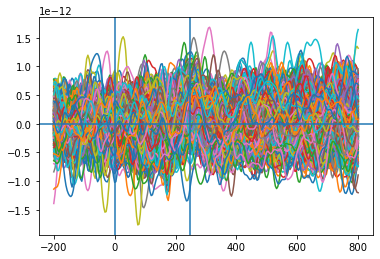

In [4]:
rep_avg = np.mean(data, axis = 0)
sensor73 = data[:,73,:]
sensor73_max = np.max(sensor73)

plt.figure() # create new figure
plt.plot(times, sensor73.T) # plot a blue line
plt.axvline(x = 0)
plt.axvline(x = 248)
plt.axhline(y = 0)
plt.show()

viii. Describe in your own words how the response found in the average is represented in the single repetitions. But do make sure to use the concepts signal and noise and comment on any differences on the range of values on the y-axis

**Aleks**: Well, visually looking at it the "signal" we found in the previous plot (and there is a clear signal with an general spike at approx 220ms) is simply lost in this plot due to there being noise in each repetition, which we don't want to model.

### 2) Now load pas_vector.npy (call it y). PAS is the same as in Assignment 2, describing the clarity of the subjective experience the subject reported after seeing the briefly presented stimulus

In [5]:
y.shape
data.shape

# Has same length as the repetitions - makes sense, of course. For each letter shown, there was
# one response of clarity of experience (from 1 to 4).

(682, 102, 251)

ii. Now make four averages (As in Exercise 1.1.iii), one for each PAS rating, and plot the four time courses (one for each PAS rating) for the sensor found in Exercise 1.1.v 1.1.vi

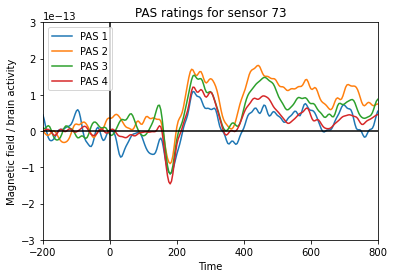

In [141]:
# Making empty lists for each PAS rating
pas_1 = []
pas_2 = []
pas_3 = []
pas_4 = []

# Making a new data set with values only coming from sensor 73
sen73 = data[:, 72, :] #72, because Python starts with 0.

# Adding together the indexed numbers belonging to each PAS value (so I can later join the sen73 data with this index number)
for i in range(len(y)):
    if y[i] == 1:
        pas_1.append(i)
    if y[i] == 2:
        pas_2.append(i)
    if y[i] == 3:
        pas_3.append(i)
    if y[i] == 4:
        pas_4.append(i)

# calculating the average
avr_rep_pas1 = np.mean(sen73[pas_1], axis=0)
avr_rep_pas2 = np.mean(sen73[pas_2], axis=0)
avr_rep_pas3 = np.mean(sen73[pas_3], axis=0)
avr_rep_pas4 = np.mean(sen73[pas_4], axis=0)

# Plotting
plt.figure()
plt.plot(times, avr_rep_pas1, label="PAS 1")
plt.plot(times, avr_rep_pas2, label="PAS 2")
plt.plot(times, avr_rep_pas3, label="PAS 3")
plt.plot(times, avr_rep_pas4, label="PAS 4")
plt.xlabel("Time")
plt.ylabel("Magnetic field / brain activity")
plt.title("PAS ratings for sensor 73")
plt.axvline(x = 0, color = "black")
plt.axhline(y = 0, color = "black")
plt.axis([-200,800,-3e-13,3e-13])
plt.legend(loc="upper left")
plt.show()


iii. Notice that there are two early peaks (measuring visual activity from the brain), one before 200 ms and one around 250 ms. Describe how the amplitudes of responses are related to the four PAS-scores. Does PAS 2 behave differently than expected?

**Aleks**: Well, I would assume that more visual activity correlates with stronger visual experience (of seeing the character). If we follow this logic, the activity for PAS 4 should be highest. PAS 3 and PAS 4 seem to be high, maybe indicating that the scale is a bit off (maybe 1 to 3 scale would be better), however what is interesting is that PAS 2 is the highest, which is a bit counterintuitive.


# EXERCISE 2 - Do logistic regression to classify pairs of PAS-ratings


### 1) Now, we are going to do Logistic Regression with the aim of classifying the PAS-rating given by the subject

i. We’ll start with a binary problem - create a new array called data_1_2 that only contains PAS responses 1 and 2. Similarly, create a y_1_2 for the target vector

In [20]:
# subsetting
data_1_2 = data[y < 3,:,:]
y_1_2 = y[y < 3]

print(len(y_1_2))
data_1_2.shape

214


(214, 102, 251)

ii. Scikit-learn expects our observations (data_1_2) to be in a 2d-array, which has samples (repetitions) on dimension 1 and features (predictor variables) on dimension 2. Our data_1_2 is a three-dimensional array. Our strategy will be to collapse our two last dimensions (sensors and time) into one dimension, while keeping the first dimension as it is (repetitions). Use np.reshape to create a variable X_1_2 that fulfils these criteria.

In [21]:
X_1_2 = np.reshape(data_1_2, newshape=(214, -1))
X_1_2.shape

## Ok so shape is kinda the same as in the previous exercise? Aight well see above.

(214, 25602)

iii. Import the StandardScaler and scale X_1_2

In [18]:
from sklearn.preprocessing import StandardScaler

X_1_2_std = StandardScaler().fit_transform(X_1_2)
X_1_2_std.shape

(214, 25602)


iv. Do a standard LogisticRegression - can be imported from sklearn.linear_model - make sure there is no penalty applied

v. Use the score method of LogisticRegression to find out how many labels were classified correctly. Are we overfitting? Besides the score, what would make you suspect that we are overfitting?

In [11]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty = 'none').fit(X_1_2_std, y_1_2)
logit.score(X_1_2_std, y_1_2)


**Aleks**: Yeah pretty sure we are overfitting. Besides the score, I think it's because we aren't testing on new data?

vi. Now apply the L1 penalty instead - how many of the coefficients (.coef_) are non-zero after this?


In [19]:
logit_penalized = LogisticRegression(random_state = 0, penalty = 'l1', solver = 'liblinear').fit(X_1_2_std, y_1_2)
logit_penalized.score(X_1_2_std, y_1_2)
print(np.sum(logit_penalized.coef_ != 0))

283


vii. Create a new reduced $X$ that only includes the non-zero coefficients - show the covariance of the non-zero features (two covariance matrices can be made; $X_{reduced}X_{reduced}^T$ or $X_{reduced}^TX_{reduced}$ (you choose the right one)) . Plot the covariance of the features using plt.imshow. Compared to the plot from 1.1.iii, do we see less covariance?

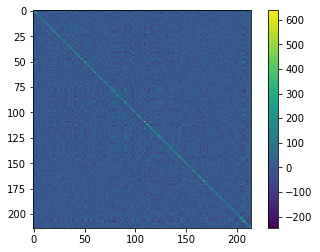

In [23]:
coefs = logit_penalized.coef_.flatten()

bools_as_indicdes = coefs != 0

X_reduced = X_1_2_std[:, bools_as_indicdes]
X_reduced.shape

covmat = X_reduced @ X_reduced.T

plt.close("all")
plt.figure()
plt.imshow(covmat)
plt.colorbar()
plt.show()

#  We see less covariance overall, the plot is more homogenous.


**Aleks**: Yes! We do! Even more homogenity than in the previous one!

### 2) Now, we are going to build better (more predictive) models by using cross-validation as an outcome measure

i. Import cross_val_score and StratifiedKFold from sklearn.model_selection

ii. To make sure that our training data sets are not biased to one target (PAS) or the other, create y_1_2_equal, which should have an equal number of each target. Create a similar X_1_2_equal. The function equalize_targets_binary in the code chunk associated with Exercise 2.2.ii can be used. Remember to scale X_1_2_equal!

In [36]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

def equalize_targets_binary(data, y):
    np.random.seed(420)
    targets = np.unique(y) ## find the number of targets
    if len(targets) > 2:
        raise NameError("can't have more than two targets")
    counts = list()
    indices = list()
    for target in targets:
        counts.append(np.sum(y == target)) ## find the number of each target
        indices.append(np.where(y == target)[0]) ## find their indices
    min_count = np.min(counts)
    # randomly choose trials
    first_choice = np.random.choice(indices[0], size=min_count, replace=False)
    second_choice = np.random.choice(indices[1], size=min_count,replace=False)
    
    # create the new data sets
    new_indices = np.concatenate((first_choice, second_choice))
    new_y = y[new_indices]
    new_data = data[new_indices, :, :]
    
    return new_data, new_y

# Making equal data with function
y_1_2 = np.array(y_1_2) # Has to be array instead of list, thats why
data_1_2_equal, y_1_2_equal = equalize_targets_binary(data_1_2, y_1_2) # Assigning new data
X_1_2_equal = data_1_2_equal.reshape(198, -1)
X_1_2_equal_std = StandardScaler().fit_transform(X_1_2_equal)

print(y_1_2_equal.shape, X_1_2_equal_std.shape)

(198,) (198, 25602)


iii. Do cross-validation with 5 stratified folds doing standard LogisticRegression (See Exercise 2.1.iv)

In [45]:
cv = StratifiedKFold()

logit = LogisticRegression().fit(X_1_2_equal_std, y_1_2_equal)
scores = cross_val_score(logit, X_1_2_equal_std, y_1_2_equal, cv=5)
print(np.mean(scores))

0.5457692307692308


iv. Do L2-regularisation with the following Cs=  [1e5, 1e1, 1e-5]. Use the same kind of cross-validation as in Exercise 2.2.iii. In the best-scoring of these models, how many more/fewer predictions are correct (on average)?

In [44]:
Cs = [1e5, 1e1, 1e-5]

for x in Cs:
    logit_l2 = LogisticRegression(C=x, penalty="l2").fit(X_1_2_equal_std, y_1_2_equal)
    scores_l2 = cross_val_score(logit_l2, X_1_2_equal_std, y_1_2_equal, cv=5)
    print(np.mean(scores_l2))

# Seems like *1.e5* is best, as it classified approx 2.5% more than *1e1* and 4% more than *1e-5*.


0.5762820512820512
0.5508974358974359
0.5355128205128205


v. Instead of fitting a model on all n_sensors * n_samples features, fit a logistic regression (same kind as in Exercise 2.2.iv (use the C that resulted in the best prediction)) for each time sample and use the same cross-validation as in Exercise 2.2.iii. What are the time points where classification is best? Make a plot with time on the x-axis and classification score on the y-axis with a horizontal line at the chance level (what is the chance level for this analysis?)

In [118]:
def timesamplefit():

    scores = []

    for i in range(251):
        sample = data_1_2_equal[:, :, i]
        sample = StandardScaler().fit_transform(sample)
        logit_l2 = LogisticRegression(C=1e5, penalty="l2", solver = "liblinear", max_iter=1500).fit(sample, y_1_2_equal)
        scores_l2 = cross_val_score(logit_l2, sample, y_1_2_equal, cv=5)
        scores.append(np.mean(scores_l2))
    
    return scores

scores = timesamplefit()


0.5907692307692308
107


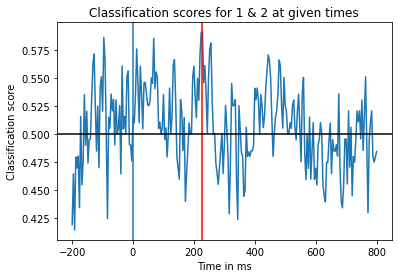

In [119]:
# Picking highest score
print(np.amax(scores)) #  What is the max value?
print(np.argmax(scores)) # What's the index of this value?

plt.figure() # create new figure
plt.plot(times, scores) # plot a blue line
plt.axvline(x = 0)
plt.axvline(times[107], color = "red")
plt.axhline(y = 0.5, color = "black") # Chance level is 50% in binary classification
plt.xlabel("Time in ms")
plt.ylabel("Classification score")
plt.title("Classification scores for 1 & 2 at given times")
plt.show()

# Classification is best from around 200 ms to 220 ms, although it jumps a lot. I guess not great not terrible?



vi. Now do the same, but with L1 regression - set C=1e-1 - what are the time points when classification is best? (make a plot)?


In [126]:
def timesamplefit():

    scores = []

    for i in range(251):
        sample = data_1_2_equal[:, :, i]
        sample = StandardScaler().fit_transform(sample)
        logit_l2 = LogisticRegression(C=1e-1, penalty="l1", solver = "liblinear", max_iter=1500).fit(sample, y_1_2_equal)
        scores_l2 = cross_val_score(logit_l2, sample, y_1_2_equal, cv=5)
        scores.append(np.mean(scores_l2))
    
    return scores

scores = timesamplefit()

# Wow it fits MUCH faster?!?

0.6464102564102564
109


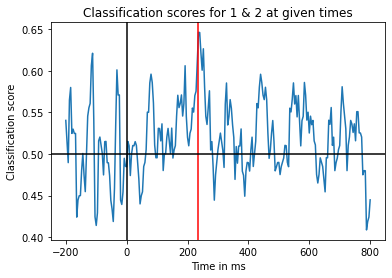

In [127]:
# Picking highest score
print(np.amax(scores)) #  What is the max value?
print(np.argmax(scores)) # What's the index of this value?

plt.figure() # create new figure
plt.plot(times, scores)
plt.axvline(x = 0, color = "black")
plt.axvline(times[109], color = "red")
plt.axhline(y = 0.5, color = "black") # Chance level is 50% in binary classification
plt.xlabel("Time in ms")
plt.ylabel("Classification score")
plt.title("Classification scores for 1 & 2 at given times")
plt.show()

# Classification is best from around 170 ms to 250 ms. Much better. NICE!

vii. Finally, fit the same models as in Exercise 2.2.vi but now for data_1_4 and y_1_4 (create a data set and a target vector that only contains PAS responses 1 and 4). What are the time points when classification is best? Make a plot with time on the x-axis and classification score on the y-axis with a horizontal line at the chance level (what is the chance level for this analysis?)

In [128]:
data_1_4 = np.concatenate((data[pas_1], data[pas_4]), axis=0)
data_1_4.shape

# Prepare target vector
y_1_4 = []
for i in range(len(y)):
    if y[i] == 1:
        y_1_4.append(1)
    if y[i] == 4:
        y_1_4.append(4)

# Making equal data with function
y_1_4 = np.array(y_1_4) # Has to be array instead of list, thats why
data_1_4_equal, y_1_4_equal = equalize_targets_binary(data_1_4, y_1_4) # Assigning new data

In [129]:
def timesamplefit():

    scores = []

    for i in range(251):
        sample = data_1_4_equal[:, :, i]
        sample = StandardScaler().fit_transform(sample)
        logit_l2 = LogisticRegression(C=1e-1, penalty="l1", solver = "liblinear", max_iter=1500).fit(sample, y_1_4_equal)
        scores_l2 = cross_val_score(logit_l2, sample, y_1_4_equal, cv=5)
        scores.append(np.mean(scores_l2))
    
    return scores

scores = timesamplefit()

0.6061538461538462
45


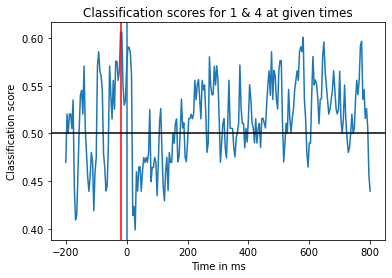

In [130]:
# Picking highest score
print(np.amax(scores)) #  What is the max value?
print(np.argmax(scores)) # What's the index of this value?

plt.figure() # create new figure
plt.plot(times, scores) # plot a blue line
plt.axvline(x = 0)
plt.axvline(times[45], color = "red")
plt.axhline(y = 0.5, color = "black") # Chance level is 50% in binary classification
plt.xlabel("Time in ms")
plt.ylabel("Classification score")
plt.title("Classification scores for 1 & 4 at given times")
plt.show()

# Whatt. That's funny? The best classification is before 0? Totally different from others?


### 3) Is pairwise classification of subjective experience possible? Any surprises in the classification accuracies, i.e. how does the classification score fore PAS 1 vs 4 compare to the classification score for PAS 1 vs 2?

**Aleks**: It seems that it classifies between PAS 1 and PAS 2 better between PAS 1 and PAS 4. But this should not come as a surprise after we looked at plot of the sensor 73 earlier - PAS 2 has the highest peak. Additionallty, I am not sure if 10% above chance is a good metric.

# EXERCISE 3 - Do a Support Vector Machine Classification on all four PAS-ratings

### 1) Do a Support Vector Machine Classification

i. First equalize the number of targets using the function associated with each PAS-rating using the function associated with Exercise 3.1.i

In [131]:
# Define function
def equalize_targets(data, y):
    np.random.seed(7)
    targets = np.unique(y)
    counts = list()
    indices = list()
    for target in targets:
        counts.append(np.sum(y == target))
        indices.append(np.where(y == target)[0])
    min_count = np.min(counts)
    first_choice = np.random.choice(indices[0], size=min_count, replace=False)
    second_choice = np.random.choice(indices[1], size=min_count, replace=False)
    third_choice = np.random.choice(indices[2], size=min_count, replace=False)
    fourth_choice = np.random.choice(indices[3], size=min_count, replace=False)
    
    new_indices = np.concatenate((first_choice, second_choice,
                                 third_choice, fourth_choice))
    new_y = y[new_indices]
    new_data = data[new_indices, :, :]
    
    return new_data, new_y

# Making data equal
data_equal, y_equal = equalize_targets(data, y)
print(data_equal.shape)
print(y_equal.shape)

(396, 102, 251)
(396,)


ii. Run two classifiers, one with a linear kernel and one with a radial basis (other options should be left at their defaults) - the number of features is the number of sensors multiplied the number of samples. Which one is better predicting the category?

In [112]:
# Import
from sklearn.svm import SVC

# Making classes
svm_linear = SVC(kernel="linear")
svm_radial = SVC(kernel="rbf")

# Converting to 2d array
X_equal = data_equal.reshape(396, -1)
print(X_equal.shape)

# Scaling data
X_equal_std = StandardScaler().fit_transform(X_equal)

# Fitting
scores_svm_linear = cross_val_score(svm_linear, X_equal_std, y_equal, cv=cv)
print("The linear basis classifier score is", np.mean(scores_svm_linear))

# Fitting
scores_svm_radial = cross_val_score(svm_radial, X_equal_std, y_equal, cv=cv)
print("The radial basis classifier score is", np.mean(scores_svm_radial))

(396, 25602)
The linear basis classifier score is 0.2928164556962025
The radial basis classifier score is 0.3333544303797468


**Aleks**: I guess not too bad, radial is 4% better, chance level here is at 25% (because of inclusion of all 4 PAS ratings), so it did pretty good all things considered. If I understand it right, it did better than logit, because logit was 10% better than chance, where radial SVM was 8% better, but since there are 4 options, 8% on 4 is better than 10% on 2? Right?

iii. Run the sample-by-sample analysis (similar to Exercise 2.2.v) with the best kernel (from Exercise 3.1.ii). Make a plot with time on the x-axis and classification score on the y-axis with a horizontal line at the chance level (what is the chance level for this analysis?)

In [132]:
svm_radial = SVC(kernel="rbf")

def timesamplefit():

    scores = []

    for i in range(251):
        sample = data_equal[:, :, i]
        svm_radial.fit(sample, y_equal)
        scores_svm = cross_val_score(svm_radial, sample, y_equal, cv=5)
        scores.append(np.mean(scores_svm))
    
    return scores

scores = timesamplefit()

[0.2854113924050633, 0.26022151898734175, 0.26018987341772154, 0.2852848101265823, 0.25737341772151895, 0.26006329113924054, 0.29287974683544304, 0.26249999999999996, 0.2625949367088608, 0.24740506329113923, 0.2297151898734177, 0.21724683544303797, 0.20715189873417722, 0.21962025316455697, 0.20205696202531645, 0.252626582278481, 0.27531645569620256, 0.2602848101265823, 0.27044303797468355, 0.272753164556962, 0.2625949367088608, 0.25746835443037974, 0.2499050632911392, 0.22977848101265824, 0.24493670886075947, 0.2650632911392405, 0.27509493670886076, 0.2778481012658228, 0.2904113924050633, 0.2904113924050633, 0.2979746835443038, 0.29037974683544304, 0.25753164556962027, 0.260126582278481, 0.23724683544303798, 0.23218354430379745, 0.2725316455696203, 0.25, 0.2651582278481013, 0.28037974683544303, 0.2929430379746836, 0.28537974683544304, 0.2828481012658227, 0.27291139240506335, 0.2123101265822785, 0.1844620253164557, 0.19702531645569618, 0.232373417721519, 0.22465189873417718, 0.270158227

0.34072784810126583
156


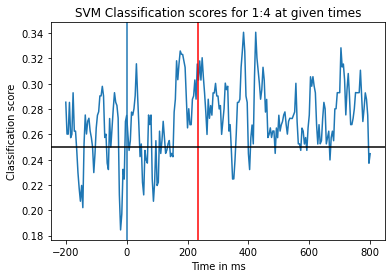

In [133]:
# Picking highest score
print(np.amax(scores)) #  What is the max value?
print(np.argmax(scores)) # What's the index of this value?

plt.figure() # create new figure
plt.plot(times, scores) # plot a blue line
plt.axvline(x = 0, color = "black")
plt.axvline(times[109], color = "red")
plt.axhline(y = 0.25, color = "black") # Chance level is at 25% in quadruple(?) classification
plt.xlabel("Time in ms")
plt.ylabel("Classification score")
plt.title("SVM Classification scores for 1:4 at given times")
plt.show()

# Classification is best from around 150 ms to 300 ms. Very nice!! Best so far! And 9% above chance level!


### 2) Finally, split the equalized data set (with all four ratings) into a training part and test part, where the test part if 30 % of the trials. Use train_test_split from sklearn.model_selection

i. Use the kernel that resulted in the best classification in Exercise 3.1.ii and fit the training set and predict on the test set. This time your features are the number of sensors multiplied by the number of samples.


In [135]:
# Import
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_equal, y_equal, test_size=0.30)

# Setting up class
svm_radial = SVC(kernel="rbf")

# Fitting
svm_radial.fit(X_train, y_train)

# Predicting
predictions = svm_radial.predict(X_test)
print(predictions)


[3 4 4 4 3 2 4 3 2 4 2 4 3 4 4 4 2 3 4 2 4 4 4 2 4 2 1 4 4 4 3 3 4 3 4 2 3
 2 4 4 4 2 4 4 1 2 4 4 2 1 3 1 3 2 3 2 3 3 4 4 1 4 4 2 4 4 4 4 4 4 4 4 2 4
 3 4 3 1 1 4 4 4 4 4 2 4 4 2 4 4 1 4 4 4 4 4 4 2 3 3 2 2 4 4 2 4 1 2 1 4 2
 4 1 1 2 2 1 4 4]


ii. Create a confusion matrix. It is a 4x4 matrix. The row names and the column names are the PAS-scores. There will thus be 16 entries. The PAS1xPAS1 entry will be the number of actual PAS1, $y_{pas1}$ that were predicted as PAS1, $\hat y_{pas1}$. The PAS1xPAS2 entry will be the number of actual PAS1, $y_{pas1}$ that were predicted as PAS2, $\hat y_{pas2}$ and so on for the remaining 14 entries. Plot the matrix.

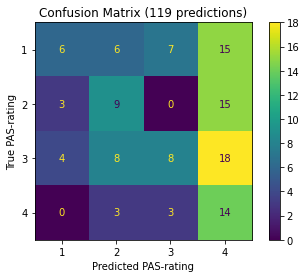

In [136]:
# Import
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as cmd

# Plot
plt.close("all")
cmd.from_estimator(svm_radial, X_test, y_test) # Plotting given estimator, test data and true labels.
plt.xlabel("Predicted PAS-rating")
plt.ylabel("True PAS-rating")
plt.title("Confusion Matrix (119 predictions)")
plt.show()



iii. Based on the confusion matrix, describe how ratings are misclassified and if that makes sense given that ratings should measure the strength/quality of the subjective experience. Is the classifier biased towards specific ratings?

**Aleks**: Sooo, it seems that SVM biases PAS 4 as it often classifies other, non PAS 4 repetitions as PAS 4. Maybe optimizing around this issue would result in better classification scores. 